# Multi-Layer Perceptron (MLP) Regressor Example with Plots using Scikit-Learn

This notebook demonstrates a detailed example of training and evaluating an MLP Regressor using the `scikit-learn` library on a synthetic regression dataset, along with plots for data visualization and loss curves.

## Step 1: Import necessary libraries

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
    

## Step 2: Generate a synthetic regression dataset

In [4]:

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
print(f'Data Shape: {X.shape}')
print(f'Target Shape: {y.shape}')
    

Data Shape: (1000, 20)
Target Shape: (1000,)


### Visualizing a sample of the data

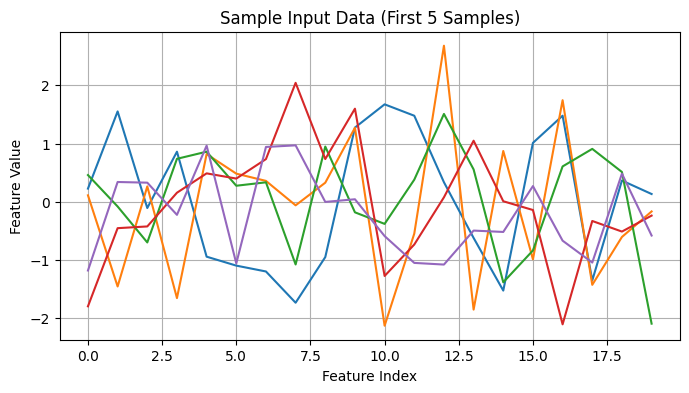

In [5]:

plt.figure(figsize=(8, 4), dpi=100)
plt.plot(X[:5].T)
plt.title('Sample Input Data (First 5 Samples)')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.grid(True)
plt.show()
    

## Step 3: Split the dataset into training and test sets

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')
    

Training set size: (700, 20)
Test set size: (300, 20)


## Step 4: Standardize the features

In [7]:

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print('Data after scaling (First 5 Samples):')
print(X_train[:5])
    

Data after scaling (First 5 Samples):
[[-1.38951869e-01 -3.87052704e-01 -1.82899454e-01 -6.04364291e-01
  -2.31176168e-01  5.06854487e-01 -2.25645460e+00  3.78003229e-02
   4.33716818e-01 -1.58156167e+00  1.49644343e+00 -4.29249469e-01
   2.64457689e-01 -1.39534763e+00  2.02373399e+00  5.25342442e-01
   3.20081933e-01  1.34651454e+00 -6.41683659e-01 -1.28975532e+00]
 [ 4.58608973e-01 -1.25752927e+00  1.09779016e+00 -1.53814451e+00
  -9.10603419e-01  3.56101575e-01 -3.85129589e-01  6.06746735e-01
   5.53245863e-01 -2.83440807e-01  8.50805119e-01 -1.86461977e-01
  -1.47476854e+00  9.21132520e-01  3.02429604e-01  2.12982421e-01
  -9.62289422e-01 -3.54020621e-02 -1.17295840e-01  1.96563564e+00]
 [-6.86113518e-01 -5.57285520e-02  1.80072220e-01 -2.99465873e-02
   1.83979716e+00 -1.58296347e+00  1.26723058e-01 -1.07566346e+00
   3.41772593e+00  9.74249754e-01 -8.42659544e-01 -6.29730068e-01
  -6.42838107e-01 -1.44795983e+00 -1.20415666e+00 -1.71161084e-01
  -7.81339038e-01 -2.09824022e-01 -5

## Step 5: Initialize and train the MLP Regressor

In [10]:

mlp_reg = MLPRegressor(hidden_layer_sizes=(100,), max_iter=3000, alpha=0.001, solver='adam', random_state=42)
mlp_reg.fit(X_train, y_train)
    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.001, max_iter=3000, random_state=42)

### Training Loss Curve

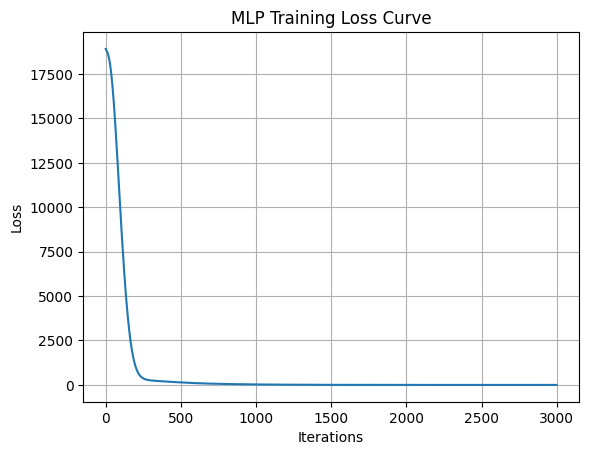

In [12]:

plt.plot(mlp_reg.loss_curve_)
plt.title('MLP Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
    

## Step 7: Make predictions on the test set

In [13]:
y_pred_reg = mlp_reg.predict(X_test)
print(f'Predictions (First 10): {y_pred_reg[:10]}')

Predictions (First 10): [-324.30557213 -380.03146289  370.90566112 -261.40547492  197.94555873
  208.44621365  414.24143707 -130.47778877  -65.55143176 -282.73557242]


### Plotting True vs Predicted Values

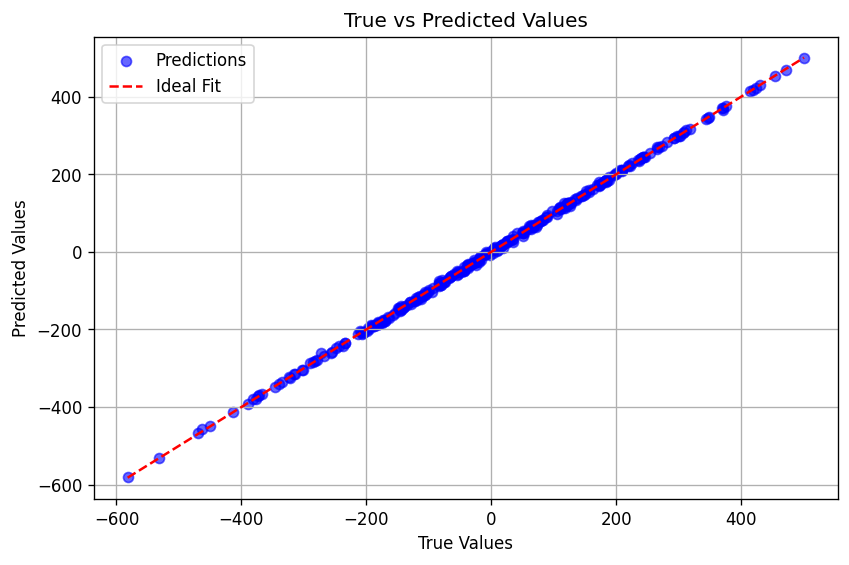

In [14]:

plt.figure(figsize=(8, 5), dpi=120)
plt.scatter(y_test, y_pred_reg, alpha=0.6, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
    

## Step 9: Evaluate the model

In [16]:

mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)
print(f'Mean Squared Error: {mse}')
    

Mean Squared Error: 12.563374563777886
